In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colorbar import make_axes, Colorbar
import numpy as np
from IPython.display import display
from ipywidgets import interact, FloatSlider, VBox, HBox, Label

In [2]:
scale_vector = np.array([2., 1., .5])
cost_vector = np.array([.02, 1., .002])

def reward_function(dx, dy, dtheta, weight, scale_vector, cost_vector):
    obj_pose_diff = np.dstack([dx, dy, dtheta * np.ones(dx.shape)])
    
    # scale diff
    obj_reward = obj_pose_diff * scale_vector

    obj_cost = np.abs(obj_pose_diff) * cost_vector

    reward = (1 - weight) * (obj_reward[..., 0] - obj_cost[..., 2])
    reward += weight * (obj_reward[..., 2] - obj_cost[..., 0])
    reward -= obj_cost[..., 1]

    return reward

In [3]:
xs = np.linspace(-.004, .004, 100)
ys = np.linspace(-.004, .004, 100)
xx, yy = np.meshgrid(xs, ys)

<IPython.core.display.Javascript object>


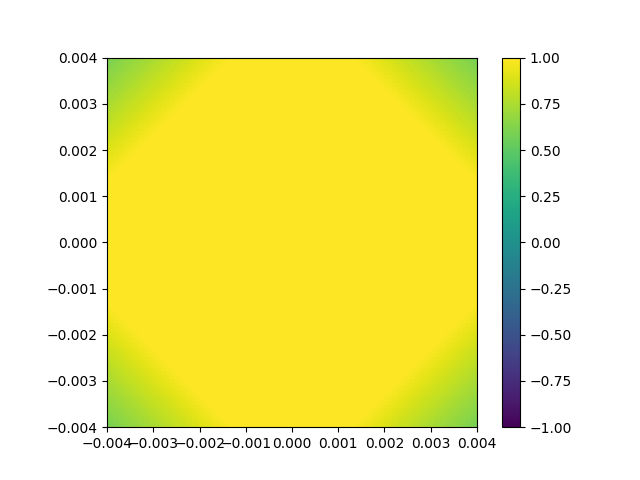

In [4]:
plt.ion()
f = plt.figure()
a = f.gca()

theta_slider = FloatSlider(min=-.03, max=.03, step=.01, value=.0, continuous_update=False)
weight_slider = FloatSlider(min=.0, max=1., step=.1, value=.0, continuous_update=False)

scale_x_slider = FloatSlider(min=.0, max=500., step=1, value=200., continuous_update=False)
scale_y_slider = FloatSlider(min=.0, max=500., step=1, value=1., continuous_update=False)
scale_t_slider = FloatSlider(min=.0, max=500., step=1, value=2., continuous_update=False)

cost_x_slider = FloatSlider(min=.0, max=500., step=1, value=200, continuous_update=False)
cost_y_slider = FloatSlider(min=.0, max=500., step=5, value=250., continuous_update=False)
cost_t_slider = FloatSlider(min=.0, max=500., step=1, value=.5, continuous_update=False)

# reward_function(xx, yy, theta).shape
i = a.imshow(reward_function(xx, yy, .0, .0, scale_vector, cost_vector),
             extent=(-.004, .004, -.004, .004), vmin=-1., vmax=1.)
cax = make_axes(a, location='right')
plt.colorbar(i, *cax)

def update(*args):
    theta = theta_slider.value
    weight = weight_slider.value
    scale_vector = np.array([scale_x_slider.value,
                             scale_y_slider.value,
                             scale_t_slider.value])
    cost_vector = np.array([cost_x_slider.value,
                            cost_y_slider.value,
                            cost_t_slider.value])
    i.set_data(reward_function(xx, yy, theta, weight,
                               scale_vector, cost_vector))
    f.canvas.draw()
    f.show()

    
theta_slider.observe(update)
weight_slider.observe(update)
scale_x_slider.observe(update)
scale_y_slider.observe(update)
scale_t_slider.observe(update)
cost_x_slider.observe(update)
cost_y_slider.observe(update)
cost_t_slider.observe(update)

upper_box = HBox([Label('theta'), theta_slider, Label('weight'), weight_slider])
middle_box = HBox([Label('scale'), scale_x_slider, scale_y_slider, scale_t_slider])
lower_box = HBox([Label('cost'), cost_x_slider, cost_y_slider, cost_t_slider])

display(VBox([upper_box, middle_box, lower_box]))

In [16]:
scale_factor = [250., 1., 60.]
cost_factor = [150, 150., 5.] 